In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt
import os

In [2]:
!pip install pytorch_memlab

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
from pytorch_memlab import LineProfiler

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

In [6]:
%load_ext autoreload
%autoreload 2

## CIFAR10 Boosting (Adversarial)

In [7]:
# maxSamples_vals = [100000, 200000, 500000]
maxSamples_vals = [750000]
# maxSamples_vals = [30001]
# maxSamples_vals = [500000, 1000000]
# done for 50K, 100K
# maxSamples_vals = [1000000, 2000000]
# maxSamples_vals = [123456]
batch_size=100
# maxSamples_vals = [batch_size + 1]

In [8]:
num_wl = 15 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [9]:
ensembles = []
# epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
epsilons = [0.0, 0.01, 0.05]
train_eps_nn = 8
# epsilons = []
# epsilons = [0.0, 0.01]

In [12]:
# from Boosting import SchapireWongMulticlassBoosting
from AdversarialAttacks import attack_fgsm
import gc
# Ensemble.record_accuracies, Ensemble.calc_accuracies, attack_fgsm, Ensemble.schapireContinuousPredict
for i in range(len(maxSamples_vals)):
    print("len(maxSamples_vals):", len(maxSamples_vals))
    maxSamples = maxSamples_vals[i]
    print("maxSamples:", maxSamples)
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=train_eps_nn, adv_train=True, batch_size=batch_size, val_flag=False)
    print("number of wl in ensemble:", len(ensemble.weakLearners))
    ensembles.append(ensemble)
    gc.collect()
#     for obj in gc.get_objects():
#         try:
#             if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
#                 print(type(obj), obj.size())
#         except:
#             pass
    
#     path_head = f'results/plots/cifar10/train_eps_{train_eps_nn}/'
#     try:
#         os.mkdir(path_head)
#     except OSError:
#         pass
#     acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
#     adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
#     loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
#     wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
#     ensemble.plot_accuracies(acc_file)
#     ensemble.plot_loss(loss_file)
#     ensemble.plot_adversarial_accuracies(adv_acc_file)
#     ensemble.plot_wl_acc(wl_train_acc_file)


len(maxSamples_vals): 1
maxSamples: 750000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.0, 0.01, 0.05]
path_head: ./models/750000Eps8/
----------------------------------------------------------------------------------------------------
Training weak learner 0
Epoch 0


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/cifar.py:118: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], self.targets[index]


Progress: 10000,  val accuracy: 0.3300
Progress: 20000,  val accuracy: 0.3600
Progress: 30000,  val accuracy: 0.3900
Progress: 40000,  val accuracy: 0.4100
Progress: 50000,  val accuracy: 0.4800


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 1
Progress: 60000,  val accuracy: 0.4600
Progress: 70000,  val accuracy: 0.4200
Progress: 80000,  val accuracy: 0.4800
Progress: 90000,  val accuracy: 0.5500
Progress: 100000,  val accuracy: 0.4600
Epoch 2
Progress: 110000,  val accuracy: 0.5000
Progress: 120000,  val accuracy: 0.5200
Progress: 130000,  val accuracy: 0.5100
Progress: 140000,  val accuracy: 0.5100
Progress: 150000,  val accuracy: 0.6400
Epoch 3
Progress: 160000,  val accuracy: 0.6400
Progress: 170000,  val accuracy: 0.6000
Progress: 180000,  val accuracy: 0.5600
Progress: 190000,  val accuracy: 0.5900
Progress: 200000,  val accuracy: 0.6000
Epoch 4
Progress: 210000,  val accuracy: 0.6400
Progress: 220000,  val accuracy: 0.5300
Progress: 230000,  val accuracy: 0.5300
Progress: 240000,  val accuracy: 0.6100
Progress: 250000,  val accuracy: 0.6200
Epoch 5
Progress: 260000,  val accuracy: 0.6600
Progress: 270000,  val accuracy: 0.5500
Progress: 280000,  val accuracy: 0.6500
Progress: 290000,  val accuracy: 0.6700
Prog

In [10]:
from Testing import testEnsemble
path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
ensemble = testEnsemble(path, [attack_fgsm], num_wl, numsamples_train=1000, numsamples_val=1000)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
ensemble accuracies: {'train': [0.7252525252525253], 'val': [0.6818181818181818], 'attack_fgsm': [[0.478787878787879]], 'attack_pgd': [], 'wl_train': [], 'wl_val': []}
ensemble accuracies: {'train': [0.7252525252525253, 0.708080808080808], 'val': [0.6818181818181818, 0.7353535353535351], 'attack_fgsm': [[0.478787878787879, 0.511111111111111]], 'attack_pgd': [], 'wl_train': [], 'wl_val': []}
ensemble accuracies: {'train': [0.7252525252525253, 0.708080808080808, 0.7555555555555559], 'val': [0.6818181818181818, 0.7353535353535351, 0.7353535353535349], 'attack_fgsm': [[0.478787878787879, 0.511111111111111, 0.5040404040404043]], 'attack_pgd': [], 'wl_train': [], 'wl_val': []}
ensemble accuracies: {'train': [0.7252525252525253, 0.708080808080808, 0.7555555555555559, 0.7444444444444444], 'val': [0.6818181818181818, 0.7353535353535351, 0.7353535353535349, 0.7393939393939388], 'atta

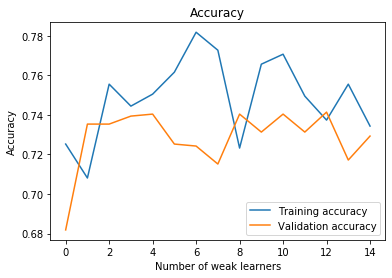

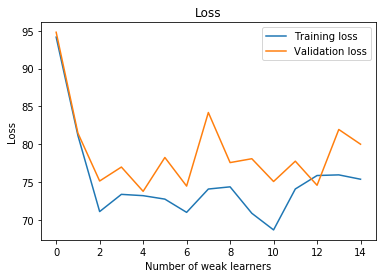

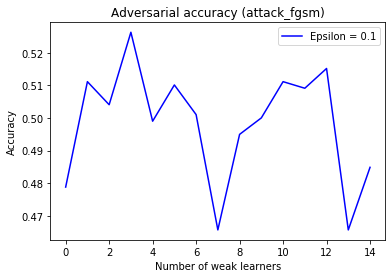

In [11]:
maxSamples = maxSamples_vals[0]
resultsPath = f'results/plots/cifar10/train_eps_{train_eps_nn}/'
acc_file = resultsPath + f'acc_maxSamples_{maxSamples}.png'
adv_acc_file = resultsPath + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = resultsPath + f'loss_maxSamples_{maxSamples}.png'
# wl_train_acc_file = resultsPath + f'wl_train_acc_maxSamples_{maxSamples}.png'
ensemble.plot_accuracies(acc_file)
ensemble.plot_loss(loss_file)
ensemble.plot_adversarial_accuracies(adv_acc_file)
# ensemble.plot_wl_acc(wl_train_acc_file)


In [ ]:
# for maxSamples in maxSamples_vals:
#         ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
#                                attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True)
#         ensembles.append(ensemble)

In [16]:
print(ensemble.accuracies)

{'train': [0.22121212121212122], 'val': [0.24343434343434336], 'attack_fgsm': [], 'attack_pgd': [], 'wl_train': [], 'wl_val': []}


In [ ]:
ensembles[0].plot_train_loss()
ensembles[0].plot_val_loss()
ensembles[0].plot_train_accuracies()
ensembles[0].plot_val_accuracies()

In [ ]:
ensembles[0].attack_eps

In [ ]:
ensembles[0].plot_wl_acc()